# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import pip

#import dataframe_image as dfi
# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
total_rides=pyber_data_df["ride_id"].count()
rides_per_city_type=pyber_data_df.groupby(["type"]).count()["ride_id"]

In [5]:
# 2. Get the total drivers for each city type
drivers_per_city_type=pyber_data_df.groupby(["type"]).sum()["driver_count"]

In [6]:
#  3. Get the total amount of fares for each city type
fares_per_city_type=pyber_data_df.groupby(["type"]).sum()["fare"]

In [7]:
#  4. Get the average fare per ride for each city type. 
total_fares=pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
total_rides=pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [9]:
avg_fare_per_ride=total_fares/total_rides
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [10]:
total_drivers=pyber_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [11]:
avg_fare_per_driver=total_fares/total_drivers
avg_fare_per_driver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [12]:
pyber_summary_df=pd.DataFrame({"Total Rides":total_rides, "Total Drivers":total_drivers, "Total Fares":total_fares, "Average fare per ride":avg_fare_per_ride, "Average fare per driver":avg_fare_per_driver})
pyber_summary_df                            

,Total Rides,Total Drivers,Total Fares,Average fare per ride,Average fare per driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [13]:
pyber_summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average fare per ride      float64
Average fare per driver    float64
dtype: object

In [14]:
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average fare per ride,Average fare per driver
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [15]:
def formatColumns(arr):
    return arr.map("${:,.2f}".format)

In [16]:
pyber_summary_df["Total Fares"]=formatColumns(pyber_summary_df["Total Fares"])

In [17]:
pyber_summary_df["Average fare per ride"]=formatColumns(pyber_summary_df["Average fare per ride"])

In [18]:
pyber_summary_df["Average fare per driver"]=formatColumns(pyber_summary_df["Average fare per driver"])

In [19]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average fare per ride,Average fare per driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


In [20]:
# 5. Get the average fare per driver for each city type. 


In [21]:
#  6. Create a PyBer summary DataFrame. 


In [22]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [23]:
#  8. Format the columns.


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [24]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [25]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
new_df_sum_fares=pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
new_df_sum_fares

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [26]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
new_df_sum_fares=new_df_sum_fares.reset_index()


In [27]:
import datetime as dt
from datetime import datetime

In [28]:
new_df_sum_fares["fare"]
new_df_sum_fares.dtypes
#new_df_sum_fares["date"]=pd.to_datetime(new_df_sum_fares["date"])
#new_df_sum_fares["date"]=new_df_sum_fares["date"].dt.strftime("%y/%m/%d")
new_df_sum_fares


,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [29]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pivot_sum_df=new_df_sum_fares.pivot(index="date",columns="type",values="fare")

In [30]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_loc_df=pivot_sum_df.loc['2019-01-01':'2019-04-28']

In [31]:
new_loc_df.index

Index(['2019-01-01 00:08:16', '2019-01-01 00:46:46', '2019-01-01 02:07:24',
       '2019-01-01 03:46:50', '2019-01-01 05:23:21', '2019-01-01 09:45:36',
       '2019-01-01 12:32:48', '2019-01-01 14:40:14', '2019-01-01 14:42:25',
       '2019-01-01 14:52:06',
       ...
       '2019-04-27 14:11:38', '2019-04-27 14:37:32', '2019-04-27 14:57:38',
       '2019-04-27 16:20:00', '2019-04-27 16:22:23', '2019-04-27 17:58:27',
       '2019-04-27 19:45:48', '2019-04-27 20:41:36', '2019-04-27 23:26:03',
       '2019-04-27 23:52:44'],
      dtype='object', name='date', length=2177)

In [32]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

new_loc_df.index=pd.to_datetime(new_loc_df.index)

In [33]:
# 7. Check that the datatype for the index is datetime using df.info()
new_loc_df.index

DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-04-27 14:11:38', '2019-04-27 14:37:32',
               '2019-04-27 14:57:38', '2019-04-27 16:20:00',
               '2019-04-27 16:22:23', '2019-04-27 17:58:27',
               '2019-04-27 19:45:48', '2019-04-27 20:41:36',
               '2019-04-27 23:26:03', '2019-04-27 23:52:44'],
              dtype='datetime64[ns]', name='date', length=2177, freq=None)

In [34]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_for_week=new_loc_df.resample("W").sum()
fares_for_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


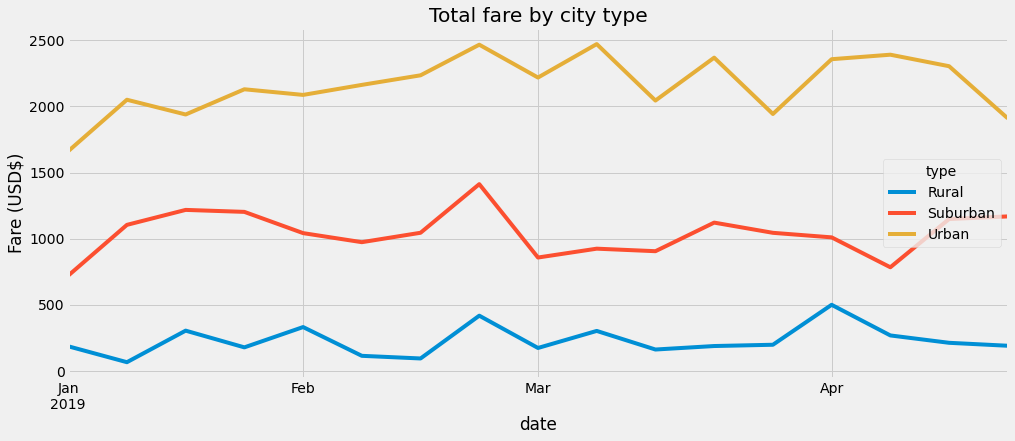

In [36]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

fares_for_week.plot(figsize=(15,6))
plt.ylabel("Fare (USD$)")
plt.title("Total fare by city type")

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.savefig("analysis/PyBer_fare_summary.png")